In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Cleaning

In [17]:
data = pd.read_csv('house_data.csv')

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [18]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [20]:
filled_series = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
filled_series.isnull().sum()

data['total_bedrooms'] = filled_series

In [21]:
ocean_proximity_unique = data['ocean_proximity'].unique()
ocean_proximity_unique

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [22]:
ocean_proximity_unique = data['ocean_proximity'].unique()
ocean_proximity_unique

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
data['ocean_proximity'] = data['ocean_proximity'].map({
    'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2,  'NEAR OCEAN': 3, 'ISLAND': 4
})

data.to_csv('cleaned_data.csv', index=False)

In [24]:
data.shape

(20640, 10)

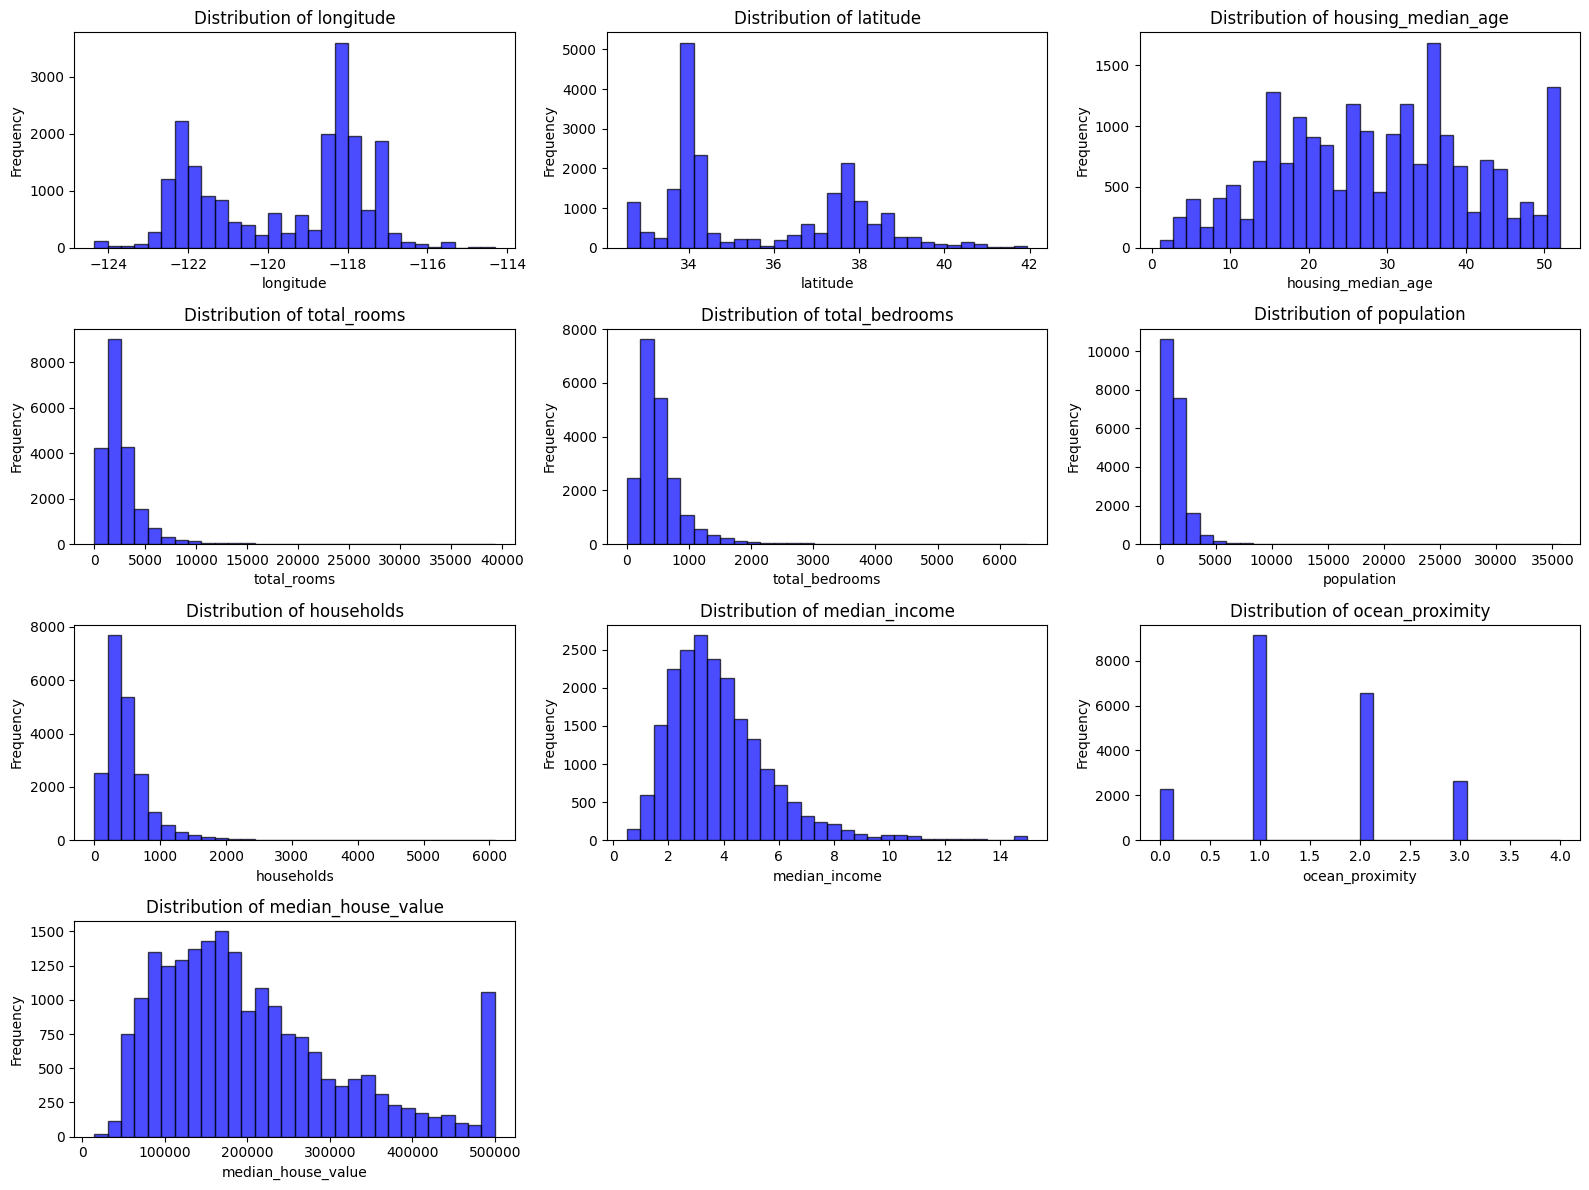

In [25]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(data.columns, 1):
    plt.subplot((len(data.columns) + 2) // 3, 3, i)
    plt.hist(data[column], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


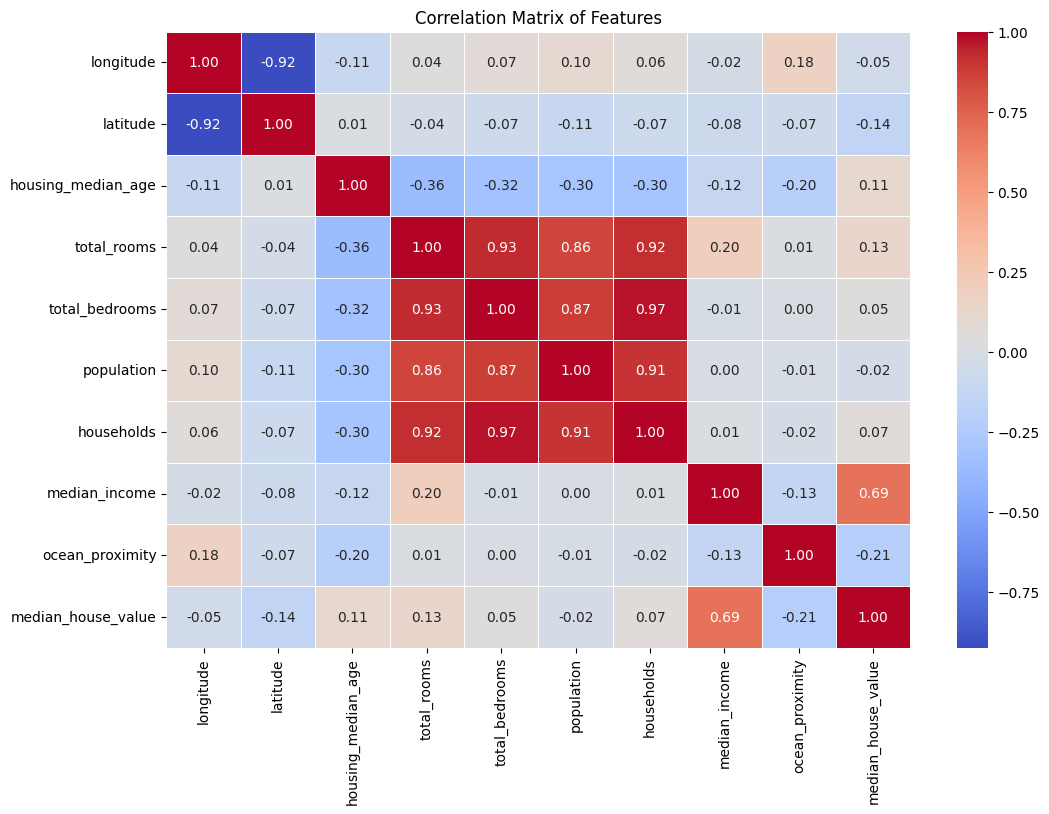

In [26]:
# Tính toán ma trận tương quan
corr_matrix = data.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [27]:
data.to_csv('cleaned_data.csv', index=False)

In [28]:
# Tính toán giá nhà cao nhất, thấp nhất và trung bình
max_price = data['median_house_value'].max()
min_price = data['median_house_value'].min()
mean_price = data['median_house_value'].mean()

max_price, min_price, mean_price


(500001, 14999, 206855.81690891474)

### Splitting

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['median_house_value'])  
y = data['median_house_value']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

train_data = X_train_scaled_df.copy()
train_data['median_house_value'] = y_train.reset_index(drop=True)

val_data = X_val_scaled_df.copy()
val_data['median_house_value'] = y_val.reset_index(drop=True)

test_data = X_test_scaled_df.copy()
test_data['median_house_value'] = y_test.reset_index(drop=True)

train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)